# Import package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('fivethirtyeight')
sns.set(style = 'whitegrid',context = 'notebook')

# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Import data

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
print(df.shape)
df.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
original_df = df.copy()

In [4]:
df = df.fillna(df.mean())
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,690.0,1.569047e+07,71506.473912,15565714.00,1.563169e+07,1.569016e+07,1.575190e+07,15815443.00
A1,690.0,6.782609e-01,0.467482,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A2,690.0,3.156820e+01,11.853273,13.75,2.267000e+01,2.862500e+01,3.770750e+01,80.25
A3,690.0,4.758725e+00,4.978163,0.00,1.000000e+00,2.750000e+00,7.207500e+00,28.00
A4,690.0,1.766667e+00,0.430063,1.00,2.000000e+00,2.000000e+00,2.000000e+00,3.00
A5,690.0,7.372464e+00,3.683265,1.00,4.000000e+00,8.000000e+00,1.000000e+01,14.00
A6,690.0,4.692754e+00,1.992316,1.00,4.000000e+00,4.000000e+00,5.000000e+00,9.00
A7,690.0,2.223406e+00,3.346513,0.00,1.650000e-01,1.000000e+00,2.625000e+00,28.50
A8,690.0,5.231884e-01,0.499824,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A9,690.0,4.275362e-01,0.495080,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00


## Numerical variables

#### Create a sub-dataframe to store all numeric variables

In [6]:
df = df.drop(['CustomerID'],axis =1)
target_var = 'Outcome'
num_vars = [var for var in df.columns if df[var].dtypes != 'O' and var != target_var]
print('Num of numerical variables',len(num_vars))
numdf = df[num_vars]
print(num_vars)
print(numdf.shape)
numdf.head()

Num of numerical variables 15
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### Scaling dataset

In [7]:
from sklearn.preprocessing import StandardScaler
numdf_norm = pd.DataFrame(StandardScaler().fit_transform(numdf))
numdf_norm.columns = numdf.columns
numdf_norm.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,0.688737,-0.801052,1.347111,0.542950,-0.916282,-0.347965,-0.190906,-1.047504,-0.864196,-0.493887,1.087908,0.237828,-0.488358,0.037380,-0.895303
1,-1.451933,-0.751240,0.450548,0.542950,0.170499,-0.347965,-0.615536,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-0.139591,-0.195413,-0.895303
2,-1.451933,-0.167856,-0.604823,-1.783978,-0.916282,-0.347965,-0.291083,-1.047504,-0.864196,-0.493887,1.087908,0.237828,0.557943,-0.195413,-0.895303
3,-1.451933,-0.835667,1.355152,-1.783978,-0.644587,-0.850257,-0.664877,0.954650,1.157144,1.769760,1.087908,0.237828,-1.069637,-0.195413,1.116941
4,0.688737,-0.962306,0.685745,0.542950,-0.372892,-0.347965,-0.078768,0.954650,1.157144,2.387119,-0.919195,0.237828,-0.720870,-0.165066,1.116941


In [8]:
numdf_norm.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,1.649244e-16,1.325832e-16,3.024955e-17,2.883362e-16,-5.148860e-18,1.618673e-16,7.111863e-17,-1.255035e-16,3.218038e-18,1.705560e-17,-2.542250e-17,-3.398248e-16,3.089316e-17,6.721676e-17,-6.886601e-17
std,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00
min,-1.451933e+00,-1.504321e+00,-9.566132e-01,-1.783978e+00,-1.731368e+00,-1.854842e+00,-6.648767e-01,-1.047504e+00,-8.641964e-01,-4.938866e-01,-9.191952e-01,-3.111174e+00,-1.069637e+00,-1.954133e-01,-8.953025e-01
25%,-1.451933e+00,-7.512404e-01,-7.555902e-01,5.429500e-01,-9.162823e-01,-3.479650e-01,-6.155359e-01,-1.047504e+00,-8.641964e-01,-4.938866e-01,-9.191952e-01,2.378277e-01,-6.046142e-01,-1.954133e-01,-8.953025e-01
50%,6.887372e-01,-2.484831e-01,-4.037999e-01,5.429500e-01,1.704986e-01,-3.479650e-01,-3.658414e-01,9.546504e-01,-8.641964e-01,-4.938866e-01,-9.191952e-01,2.378277e-01,-1.395912e-01,-1.944530e-01,-8.953025e-01
75%,6.887372e-01,5.183168e-01,4.922602e-01,5.429500e-01,7.138890e-01,1.543276e-01,1.200908e-01,9.546504e-01,1.157144e+00,1.234717e-01,1.087908e+00,2.378277e-01,5.114411e-01,-1.194481e-01,1.116941e+00
max,6.887372e-01,4.110014e+00,4.672031e+00,2.869878e+00,1.800670e+00,2.163498e+00,7.857628e+00,9.546504e-01,1.157144e+00,1.329378e+01,1.087908e+00,3.586829e+00,1.055594e+01,1.901199e+01,1.116941e+00


In [9]:
from sklearn.preprocessing import MinMaxScaler
numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(numdf))
numdf_norm.columns = numdf.columns
numdf_norm.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212,0.0
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000,0.0
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000,0.0
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000,1.0
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158,1.0


In [10]:
numdf_norm.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,0.267943,0.169954,0.383333,0.490190,0.461594,0.078014,0.523188,0.427536,0.035821,0.457971,0.464493,0.092007,0.010174,0.444928
std,0.467482,0.178245,0.177792,0.215031,0.283328,0.249040,0.117422,0.499824,0.495080,0.072581,0.498592,0.149407,0.086080,0.052101,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.134135,0.035714,0.500000,0.230769,0.375000,0.005789,0.000000,0.000000,0.000000,0.000000,0.500000,0.040000,0.000000,0.000000
50%,1.000000,0.223684,0.098214,0.500000,0.538462,0.375000,0.035088,1.000000,0.000000,0.000000,0.000000,0.500000,0.080000,0.000050,0.000000
75%,1.000000,0.360263,0.257411,0.500000,0.692308,0.500000,0.092105,1.000000,1.000000,0.044776,1.000000,0.500000,0.136000,0.003955,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Combine all predictors (numeric ones and dummy variables generated above)

In [12]:
X = numdf_norm
print (X.shape)
y = df['Class']
print (y.shape)

(690, 15)
(690,)


In [13]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212,0.0
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000,0.0
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000,0.0
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000,1.0
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158,1.0


## Spliting data into training and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((552, 15), (138, 15))

In [15]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Feature Selection

## Filter

### Basic Filter

#### Remove constant features for numerical variables

In [16]:
# remove constant features
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((552, 15), (138, 15))

#### Remove duplicated features

In [17]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10


0

In [18]:
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((552, 15), (138, 15))

In [19]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Pearson Correlation

In [20]:
cor_list = []
feature_name = X_train.columns.tolist()

for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0, 1]
    cor_list.append(cor)
cor_list = [0 if np.isnan(i) else i for i in cor_list]
cor_list = np.round(np.abs(cor_list),3)
cor_list

array([0.014, 0.162, 0.206, 0.194, 0.374, 0.247, 0.322, 0.72 , 0.458,
       0.406, 0.032, 0.115, 0.1  , 0.176, 1.   ])

In [21]:
cor_support = cor_list > cor_list.mean()
cor_support

array([False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False,  True])

In [22]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(feature_name, cor_list), key=lambda x: x[1] * -1)
corr_features = pd.DataFrame(values, columns = headers)

In [23]:
corr_features

,name,score
0,Class,1.000
1,A8,0.720
2,A9,0.458
3,A10,0.406
4,A5,0.374
5,A7,0.322
6,A6,0.247
7,A3,0.206
8,A4,0.194
9,A14,0.176


### Single AUC of each variable  

In [24]:
auc_list = []
feature_name = X_train.columns.tolist()

for i in X.columns.tolist():
        fpr, tpr, thresholds = metrics.roc_curve(np.array(y_train), np.array(X_train[i]))
        if metrics.auc(fpr, tpr)+0>0.5:
             z=metrics.auc(fpr, tpr)+0
        else:       
            z=1-metrics.auc(fpr, tpr)+0
        auc_list.append(z)

auc_support = np.array(auc_list) > np.array(auc_list).mean()
auc_support

array([False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False,  True])

In [25]:
headers = ["name","score"]
values = sorted(zip(feature_name, auc_list), key=lambda x: x[1] * -1)
auc_features = pd.DataFrame(values, columns = headers)
auc_features

,name,score
0,Class,1.000000
1,A8,0.855199
2,A10,0.768235
3,A9,0.731685
4,A7,0.726246
5,A5,0.719615
6,A14,0.653086
7,A6,0.622301
8,A3,0.611937
9,A4,0.582645


In [26]:
from sklearn.tree import DecisionTreeClassifier

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [27]:
rocauc_support = roc_values > np.array(roc_values).mean()
rocauc_support

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True,  True])

In [28]:
headers = ["name","score"]
values = sorted(zip(feature_name, roc_values), key=lambda x: x[1] * -1)
rocauc_features = pd.DataFrame(values, columns = headers)
rocauc_features

,name,score
0,Class,1.000000
1,A8,0.892202
2,A10,0.752898
3,A9,0.714331
4,A7,0.666702
5,A14,0.663224
6,A5,0.641517
7,A13,0.631823
8,A6,0.592202
9,A4,0.586617


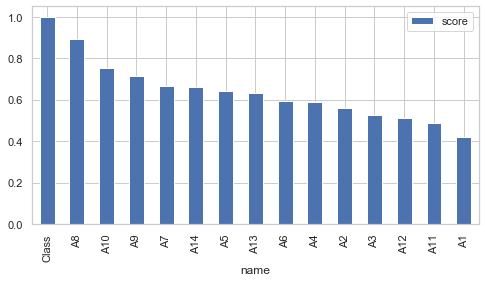

In [29]:

rocauc_features.sort_values('score',ascending=False).plot.bar(figsize=(8, 4),x='name')

### Chi-2

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_selector = SelectKBest(chi2, k=4)
chi_selector.fit(X_train, y_train)
# check which one is selected
chi_support = chi_selector.get_support(indices=False)
chi_support

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True])

In [31]:
chi_selector.get_support(indices=True)
chi_feature = X_train.loc[:,chi_support].columns.tolist()
chi_feature

['A8', 'A9', 'A10', 'Class']

In [32]:
# Variable Importance
feature_list = X_train.columns
# Get numerical feature importance
importance_list = list(chi_selector.scores_)
# p value
pvalue_list = list(chi_selector.pvalues_)

#get feature importances from the model
headers = ["name", "score", "pvalue"]
# values = sorted(zip(feature_list, cor_list, pvalue_list), key=lambda x: x[1] * -1)
values = sorted(zip(feature_list, importance_list, pvalue_list))
values = sorted(values, key = lambda x: x[1], reverse = True)
chi_features = pd.DataFrame(values, columns = headers)
chi_features

,name,score,pvalue
0,Class,310.000000,2.183859e-69
1,A8,129.214709,6.086507e-30
2,A9,68.543234,1.241263e-16
3,A10,13.921500,1.906056e-04
4,A5,13.224977,2.762431e-04
5,A7,10.592400,1.135535e-03
6,A6,4.713799,2.992146e-02
7,A14,4.514100,3.361656e-02
8,A3,4.112917,4.255691e-02
9,A4,2.472524,1.158517e-01


#### f_classif

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


f_selector = SelectKBest(f_classif, k=4)
f_selector.fit_transform(X_train, y_train)
f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature

['A8', 'A9', 'A10', 'Class']

In [34]:
# Variable Importance
feature_list = X_train.columns
# Get numerical feature importance
importance_list = list(f_selector.scores_)
# p value
pvalue_list = list(f_selector.pvalues_)

#get feature importances from the model
headers = ["name", "score", "pvalue"]
values = sorted(zip(feature_list, importance_list, pvalue_list))
values = sorted(values, key = lambda x: x[1], reverse = True)
f_features = pd.DataFrame(values, columns = headers)
f_features

,name,score,pvalue
0,Class,inf,0.000000e+00
1,A8,547.582009,1.449902e-84
2,A9,151.731744,5.807414e-31
3,A10,105.046511,1.121714e-22
4,A5,92.952921,1.983577e-20
5,A7,64.238519,6.643387e-15
6,A6,38.672435,9.924773e-10
7,A3,23.289419,1.807818e-06
8,A4,21.718959,3.964778e-06
9,A14,15.398968,9.806649e-05


### Examining correlated features

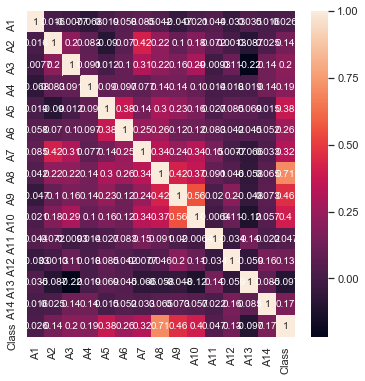

In [35]:
# Correlation matrix
cormat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(cormat, annot = True)
plt.show()

In [36]:
corrmat = X_train.corr()
corrmat

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
A1,1.000000,0.016189,-0.007736,-0.067578,0.018799,0.058060,0.085181,0.041869,-0.046716,0.020922,0.044077,-0.033210,0.035050,0.015597,0.025796
A2,0.016189,1.000000,0.202242,0.082989,-0.090000,0.070025,0.416505,0.222755,0.100537,0.178936,0.072143,0.001296,-0.086553,0.025154,0.143784
A3,-0.007736,0.202242,1.000000,0.090822,0.012464,0.099666,0.311937,0.216264,0.160283,0.290214,-0.009251,0.108673,-0.218468,0.137091,0.201554
A4,-0.067578,0.082989,0.090822,1.000000,0.090391,0.097069,0.076997,0.138961,0.139103,0.101541,0.014027,0.017858,0.018656,0.137525,0.194907
A5,0.018799,-0.090000,0.012464,0.090391,1.000000,0.377901,0.143745,0.300277,0.231335,0.159371,0.027074,0.084564,0.068732,0.015173,0.380226
A6,0.058060,0.070025,0.099666,0.097069,0.377901,1.000000,0.246214,0.255356,0.123197,0.119839,0.083236,0.041584,0.045001,0.051778,0.256309
A7,0.085181,0.416505,0.311937,0.076997,0.143745,0.246214,1.000000,0.341363,0.242964,0.336622,0.151044,0.007703,-0.066032,0.032677,0.323392
A8,0.041869,0.222755,0.216264,0.138961,0.300277,0.255356,0.341363,1.000000,0.420401,0.365516,0.091096,0.046289,-0.058086,0.065460,0.706327
A9,-0.046716,0.100537,0.160283,0.139103,0.231335,0.123197,0.242964,0.420401,1.000000,0.559340,0.020096,0.199203,-0.047538,0.072968,0.465000
A10,0.020922,0.178936,0.290214,0.101541,0.159371,0.119839,0.336622,0.365516,0.559340,1.000000,-0.006406,0.107233,-0.122795,0.056532,0.400456


In [37]:
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

2

In [40]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((552, 13), (138, 13))

In [41]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Approach 2: Identify groups of highly correlated features

In [42]:
corrmat = X_train.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.185808,0.202589,0.123185,0.058311,-0.035769,0.009676,0.655426
Glucose,0.185808,1.000000,0.198283,0.175339,0.567717,0.204807,0.114756,0.326173
BloodPressure,0.202589,0.198283,1.000000,0.213741,0.073679,0.333915,0.007383,0.301155
SkinThickness,0.123185,0.175339,0.213741,1.000000,0.164546,0.641496,0.175475,0.179684
Insulin,0.058311,0.567717,0.073679,0.164546,1.000000,0.230716,0.115153,0.211024
BMI,-0.035769,0.204807,0.333915,0.641496,0.230716,1.000000,0.157281,0.055452
DiabetesPedigreeFunction,0.009676,0.114756,0.007383,0.175475,0.115153,0.157281,1.000000,0.066986
Age,0.655426,0.326173,0.301155,0.179684,0.211024,0.055452,0.066986,1.000000


In [43]:
corrmat = corrmat.abs().unstack()
corrmat

Pregnancies               Pregnancies                 1.000000
                          Glucose                     0.185808
                          BloodPressure               0.202589
                          SkinThickness               0.123185
                          Insulin                     0.058311
                          BMI                         0.035769
                          DiabetesPedigreeFunction    0.009676
                          Age                         0.655426
Glucose                   Pregnancies                 0.185808
                          Glucose                     1.000000
                          BloodPressure               0.198283
                          SkinThickness               0.175339
                          Insulin                     0.567717
                          BMI                         0.204807
                          DiabetesPedigreeFunction    0.114756
                          Age                         0

In [44]:
corrmat = corrmat.sort_values(ascending=False)
corrmat

Age                       Age                         1.000000
DiabetesPedigreeFunction  DiabetesPedigreeFunction    1.000000
Glucose                   Glucose                     1.000000
BloodPressure             BloodPressure               1.000000
SkinThickness             SkinThickness               1.000000
Insulin                   Insulin                     1.000000
BMI                       BMI                         1.000000
Pregnancies               Pregnancies                 1.000000
                          Age                         0.655426
Age                       Pregnancies                 0.655426
SkinThickness             BMI                         0.641496
BMI                       SkinThickness               0.641496
Glucose                   Insulin                     0.567717
Insulin                   Glucose                     0.567717
BloodPressure             BMI                         0.333915
BMI                       BloodPressure               0

In [45]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Age,Age,1.0
1,DiabetesPedigreeFunction,DiabetesPedigreeFunction,1.0
2,Glucose,Glucose,1.0
3,BloodPressure,BloodPressure,1.0
4,SkinThickness,SkinThickness,1.0


In [46]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 8 total features


In [47]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

   feature1                  feature2      corr
0       Age                       Age  1.000000
9       Age               Pregnancies  0.655426
16      Age                   Glucose  0.326173
19      Age             BloodPressure  0.301155
25      Age                   Insulin  0.211024
34      Age             SkinThickness  0.179684
53      Age  DiabetesPedigreeFunction  0.066986
56      Age                       BMI  0.055452



In [48]:
group = correlated_groups[0]
group

,feature1,feature2,corr
0,Age,Age,1.000000
9,Age,Pregnancies,0.655426
16,Age,Glucose,0.326173
19,Age,BloodPressure,0.301155
25,Age,Insulin,0.211024
34,Age,SkinThickness,0.179684
53,Age,DiabetesPedigreeFunction,0.066986
56,Age,BMI,0.055452


### Wrapper

#### Recursive feature elimination with cross validation and Logistic Regression

In [42]:
strat_k_fold = 10
# Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

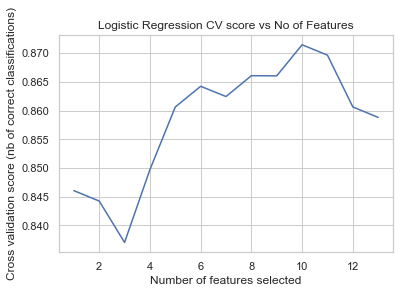

In [43]:
# plot grid_scores_
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [44]:
feature_importance = list(zip(X.columns, rfecv.support_))
rfecv_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        rfecv_features.append(value[0])        
print(rfecv_features)

['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A11', 'A12', 'A13']


In [66]:
feature_importance

[('A1', False),
 ('A2', False),
 ('A3', True),
 ('A4', True),
 ('A5', True),
 ('A6', True),
 ('A7', True),
 ('A8', True),
 ('A9', True),
 ('A10', False),
 ('A11', True),
 ('A12', True),
 ('A13', True)]

### Recursive feature elimination (RFE) with random forest

In [67]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 13 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=10, step=10, verbose=5)

In [68]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [69]:
rfe_feature

['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A13', 'A14']

# Embeded

#### Lasso

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.25*median')
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
embeded_lr_feature

['A4', 'A5', 'A8', 'A14']

#### Random Forest

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
embeded_rf_feature

['A7', 'A8', 'A9', 'A14']

#### LightGBM

In [51]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
embeded_lgb_feature

['A2', 'A3', 'A7', 'A9', 'A13', 'A14']

### Gradient Boosted trees importance

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

embeded_gbt_selector = SelectFromModel(GradientBoostingClassifier())
embeded_gbt_selector.fit(X_train, y_train)

embeded_gbt_support = embeded_gbt_selector.get_support()
embeded_gbt_feature = X_train.loc[:,embeded_gbt_support].columns.tolist()
embeded_gbt_feature

['A8']

### Tree based feature selection and random forest classification

Feature ranking:
1. feature 14 (0.535754)
2. feature 7 (0.175867)
3. feature 9 (0.067555)
4. feature 13 (0.041539)
5. feature 6 (0.040668)
6. feature 8 (0.031747)
7. feature 4 (0.028501)
8. feature 2 (0.020922)
9. feature 1 (0.017456)
10. feature 12 (0.016744)
11. feature 5 (0.009157)
12. feature 3 (0.005400)
13. feature 11 (0.004449)
14. feature 10 (0.002469)
15. feature 0 (0.001771)


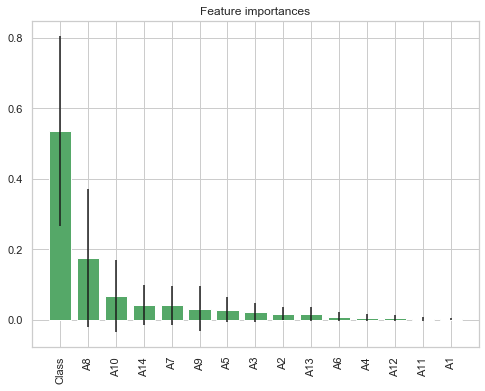

In [53]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [70]:
len(cor_support)

15

In [65]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support,'ROC-AUC':rocauc_support,'Chi-2':chi_support,
                                    'RFE':rfe_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(5)

ValueError: arrays must all be same length